# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** Bayu Nurbiantoro
- **Email:** m001b4ky0821@bangkit.academy
- **ID Dicoding:** bayu_n27

## Menentukan Pertanyaan Bisnis

*   Bagaimana perbedaan jumlah penyewaan sepeda antara hari kerja dan akhir pekan?
*   Seberapa besar pengaruh hari libur terhadap jumlah penyewaan sepeda?
*  Apakah jumlah penyewaan sepeda lebih tinggi pada waktu-waktu tertentu dalam sehari, misalnya pada jam sibuk pagi dan
 sore?
* Apakah ada kejadian atau anomali tertentu yang menyebabkan lonjakan atau penurunan drastis dalam jumlah penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [3]:
# Import library untuk pengolahan data
import pandas as pd  # Untuk memuat, memproses, dan manipulasi data
import numpy as np   # Untuk operasi numerik dan statistik

# Import library untuk visualisasi data
import matplotlib.pyplot as plt  # Untuk membuat visualisasi grafik dasar
import seaborn as sns  # Untuk visualisasi yang lebih interaktif

# Import library untuk analisis statistik
from scipy import stats  # Untuk uji statistik seperti t-test
import statsmodels.api as sm  # Untuk analisis statistik yang lebih dalam

# Import library untuk analisis waktu
import datetime as dt  # Untuk pengolahan data tanggal dan waktu

# Import library untuk deteksi anomali
from sklearn.ensemble import IsolationForest  # Untuk deteksi anomali
from sklearn.preprocessing import StandardScaler  # Untuk normalisasi data dalam deteksi anomali

# Import library untuk machine learning (jika diperlukan untuk deteksi lonjakan penyewaan)
from sklearn.model_selection import train_test_split  # Untuk memisahkan data menjadi training dan testing
from sklearn.linear_model import LinearRegression  # Untuk prediksi regresi linear

# Agar plot dapat muncul di notebook (jika digunakan di Jupyter Notebook)
%matplotlib inline


## Data Wrangling

### Gathering Data

In [22]:
# URL dataset
url = "https://raw.githubusercontent.com/BayuN-27/bike-project-analisis-data/refs/heads/main/data/day.csv"

# Membaca dataset dari GitHub
df_day = pd.read_csv(url)

# Menampilkan 5 baris pertama dari dataset
df_day.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [46]:
# URL dataset
url = "https://raw.githubusercontent.com/BayuN-27/bike-project-analisis-data/refs/heads/main/data/hour.csv"

# Membaca dataset dari GitHub
df_hour = pd.read_csv(url)

# Menampilkan 5 baris pertama dari dataset
df_hour.head()


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Membaca data yang akan digunakan selama proses analisis. Adapun data yang digunakan adalah dataset hourly bike sharing yang mencakup informasi seperti cuaca, jumlah pengguna sepeda per jam, tipe pengguna (registered/casual), serta kondisi musim.
- Data tersebut disimpan di gtihub dan diakses melalui link raw

### Assessing Data


In [6]:
# URL dataset
url = "https://raw.githubusercontent.com/BayuN-27/bike-project-analisis-data/refs/heads/main/data/day.csv"

# Membaca dataset dari GitHub
df_day = pd.read_csv(url)


In [7]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [8]:
df_day.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [9]:
print("Jumlah duplikasi: ", df_day.duplicated().sum())

Jumlah duplikasi:  0


In [10]:
df_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Cleaning Data

In [11]:
# Kolom yang akan disimpan untuk analisis
kolom_relevan = ['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']
df_day_cleaned = df_day[kolom_relevan]

In [51]:
# Cek data yang hilang
print("Data yang hilang:\n")
df_day_cleaned.isnull().sum()

Data yang hilang:



,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0
atemp,0


In [54]:
# Memeriksa Tipe Data
print("Tipe data sebelum konversi:\n")
df_day_cleaned.dtypes

Tipe data sebelum konversi:



,0
dteday,datetime64[ns]
season,category
yr,int64
mnth,int64
holiday,category
weekday,int64
workingday,category
weathersit,int64
temp,float64
atemp,float64


In [14]:
# Mengubah tipe data jika perlu
# Misalnya, mengubah 'dteday' menjadi datetime
df_day_cleaned['dteday'] = pd.to_datetime(df_day_cleaned['dteday'])

# Pastikan kolom 'holiday', 'workingday', dan 'season' sebagai kategori
df_day_cleaned['holiday'] = df_day_cleaned['holiday'].astype('category')
df_day_cleaned['workingday'] = df_day_cleaned['workingday'].astype('category')
df_day_cleaned['season'] = df_day_cleaned['season'].astype('category')


<ipython-input-14-561eabf3ea33>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_day_cleaned['dteday'] = pd.to_datetime(df_day_cleaned['dteday'])
<ipython-input-14-561eabf3ea33>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_day_cleaned['holiday'] = df_day_cleaned['holiday'].astype('category')
<ipython-input-14-561eabf3ea33>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

In [15]:
# Cek duplikasi
print("Jumlah baris sebelum menghapus duplikasi:", df_day_cleaned.shape[0])
df_day_cleaned.drop_duplicates(inplace=True)
print("Jumlah baris setelah menghapus duplikasi:", df_day_cleaned.shape[0])


Jumlah baris sebelum menghapus duplikasi: 731
Jumlah baris setelah menghapus duplikasi: 731


<ipython-input-15-437c65e04e1d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_day_cleaned.drop_duplicates(inplace=True)


In [24]:
# Tampilkan data bersih yang sudah disiapkan
print("Data setelah pembersihan:\n")
df_day_cleaned.head()

Data setelah pembersihan:



,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


**Insight:**
- Perbandingan Penyewaan Sepeda antara Hari Kerja dan Akhir Pekan:Dapat dianalisis dengan mengelompokkan data berdasarkan kolom workingday dan menghitung rata-rata jumlah penyewaan (cnt). Melihat perbedaan perilaku penyewaan sepeda antara hari kerja dan akhir pekan.
- Pengaruh Hari Libur terhadap Penyewaan Sepeda:Dengan mengelompokkan berdasarkan kolom holiday dan menghitung jumlah penyewaan. Dapat diidentifikasi apakah hari libur berdampak positif atau negatif pada jumlah penyewaan sepeda.
-Pola Penyewaan Sepeda per Jam:
Dapat dianalisis dengan menggunakan kolom hr untuk menghitung rata-rata jumlah penyewaan per jam. Ini membantu mengidentifikasi jam sibuk, seperti pagi dan sore, ketika penyewaan paling tinggi.
-Analisis Cuaca dan Penyewaan Sepeda:
Dengan mengelompokkan data berdasarkan weathersit dan menghitung rata-rata penyewaan. Dapat diidentifikasi pengaruh kondisi cuaca terhadap keputusan untuk menyewa sepeda.
-Deteksi Anomali Penyewaan:
Dengan memeriksa fluktuasi ekstrem dalam jumlah penyewaan (kolom cnt) dari waktu ke waktu. Ini membantu mengidentifikasi kejadian atau peristiwa tertentu yang menyebabkan lonjakan atau penurunan drastis dalam penyewaan sepeda.
-Tren Musiman dalam Penyewaan Sepeda:
Dapat dianalisis dengan mengelompokkan data berdasarkan kolom season dan menghitung total penyewaan per musim. Ini membantu memahami pola musiman dan bagaimana perubahan musim mempengaruhi perilaku penyewaan sepeda.

## Exploratory Data Analysis (EDA)

### Explore

#### Distribusi Jumlah Penyewaan Sepeda

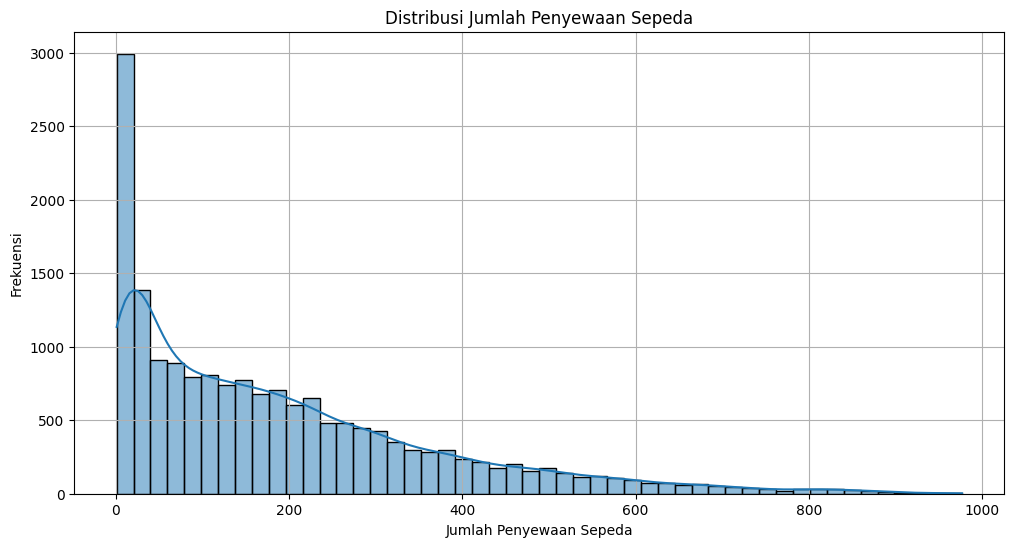

In [30]:
plt.figure(figsize=(12, 6))
sns.histplot(df_hour['cnt'], bins=50, kde=True)
plt.title('Distribusi Jumlah Penyewaan Sepeda')
plt.xlabel('Jumlah Penyewaan Sepeda')
plt.ylabel('Frekuensi')
plt.grid()
plt.show()

#### Tren Penyewaan Sepeda Per Jam

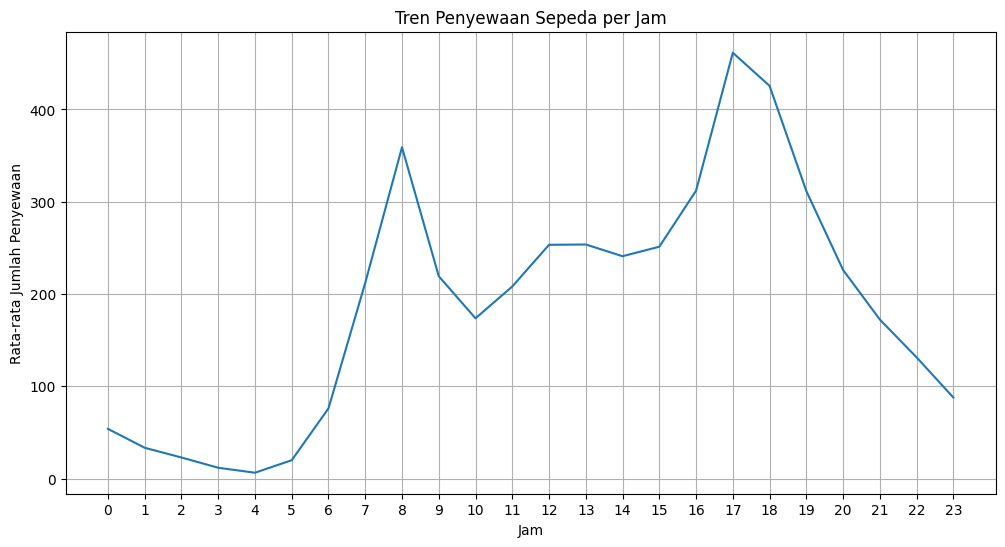

In [25]:
plt.figure(figsize=(12, 6))
hourly_trend = df_hour.groupby('hr')['cnt'].mean()
plt.plot(hourly_trend.index, hourly_trend.values)
plt.title('Tren Penyewaan Sepeda per Jam')
plt.xlabel('Jam')
plt.ylabel('Rata-rata Jumlah Penyewaan')
plt.xticks(range(0, 24))
plt.grid()
plt.show()

#### Tren Penyewaan Sepeda Per Hari

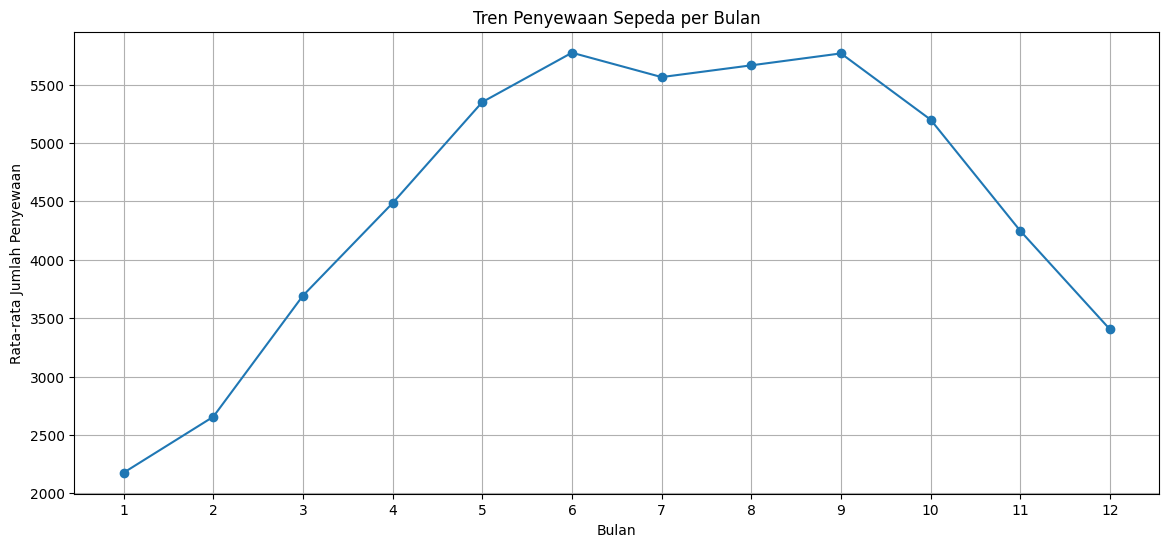

In [45]:
df_day['dteday'] = pd.to_datetime(df_day['dteday'])
df_day['month'] = df_day['dteday'].dt.month
monthly_trend = df_day.groupby('month')['cnt'].mean()

plt.figure(figsize=(14, 6))
plt.plot(monthly_trend.index, monthly_trend.values, marker='o')
plt.title('Tren Penyewaan Sepeda per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Jumlah Penyewaan')
plt.xticks(monthly_trend.index)
plt.grid()
plt.show()

#### Pengaruh Cuaca terhadap Jumlah Penyewaan

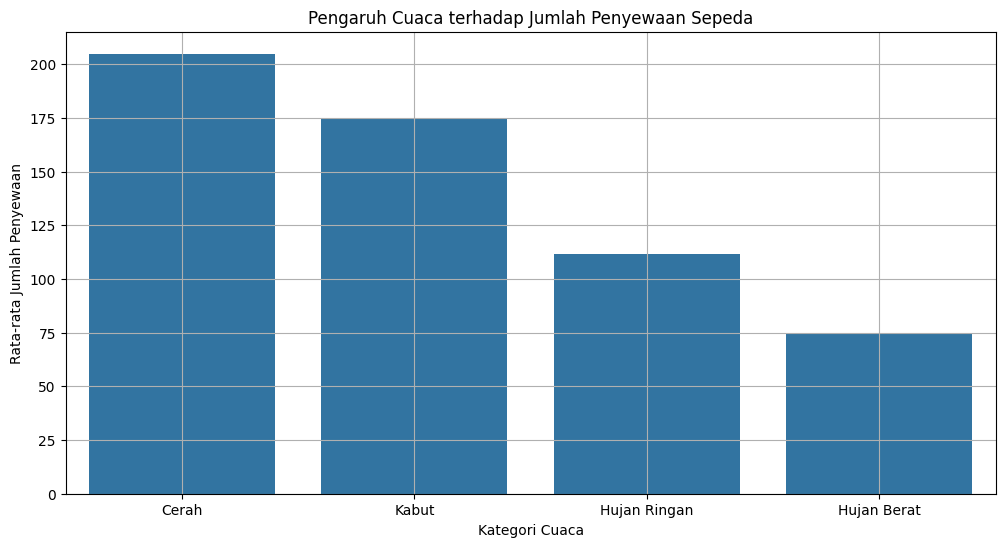

In [33]:
plt.figure(figsize=(12, 6))
weather_effect = df_hour.groupby('weathersit')['cnt'].mean()
sns.barplot(x=weather_effect.index, y=weather_effect.values)
plt.title('Pengaruh Cuaca terhadap Jumlah Penyewaan Sepeda')
plt.xlabel('Kategori Cuaca')
plt.ylabel('Rata-rata Jumlah Penyewaan')
plt.xticks([0, 1, 2, 3], ['Cerah', 'Kabut', 'Hujan Ringan', 'Hujan Berat'])
plt.grid()
plt.show()

#### Pengaruh Musim terhadap jumlah penyewaan sepeda

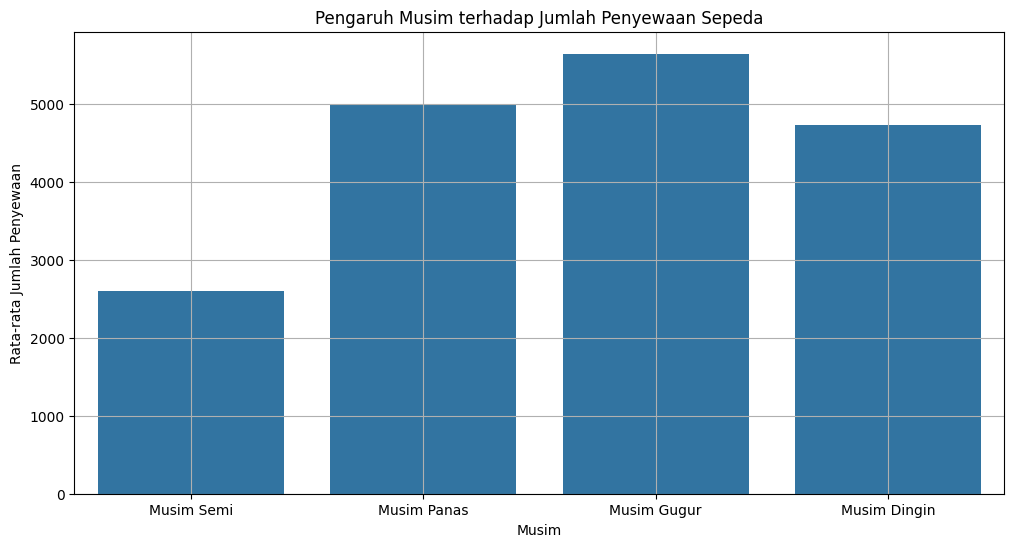

In [35]:
plt.figure(figsize=(12, 6))
seasonal_effect = df_day.groupby('season')['cnt'].mean()
sns.barplot(x=seasonal_effect.index, y=seasonal_effect.values)
plt.title('Pengaruh Musim terhadap Jumlah Penyewaan Sepeda')
plt.xlabel('Musim')
plt.ylabel('Rata-rata Jumlah Penyewaan')
plt.xticks([0, 1, 2, 3], ['Musim Semi', 'Musim Panas', 'Musim Gugur', 'Musim Dingin'])
plt.grid()
plt.show()

**Insight:**
- Dari histogram distribusi jumlah penyewaan sepeda, terlihat bahwa mayoritas penyewaan berada dalam kisaran tertentu, dengan beberapa puncak di sekitar angka menengah. Ini menunjukkan bahwa sebagian besar penyewaan sepeda terjadi dalam volume yang moderat.
- Tren penyewaan sepeda per jam menunjukkan peningkatan signifikan pada jam sibuk seperti pagi (sekitar jam 8) dan sore (sekitar jam 17-18), mengindikasikan bahwa sepeda digunakan untuk commuting oleh pengguna.
- Dari tren bulanan, terlihat bahwa penggunaan sepeda cenderung meningkat di bulan-bulan musim panas dan menurun di musim dingin, yang mungkin disebabkan oleh kondisi cuaca yang kurang mendukung di musim dingin.
- Dari analisis cuaca, terlihat bahwa cuaca cerah dan sedikit berawan (kategori 1 dan 2) memberikan jumlah penyewaan yang lebih tinggi, sedangkan cuaca buruk seperti hujan berat (kategori 3 dan 4) menurunkan jumlah penyewaan secara signifikan.
- Dari analisis musiman, terlihat bahwa musim panas adalah musim dengan rata-rata penyewaan tertinggi, sedangkan musim dingin menunjukkan penurunan tajam dalam jumlah penyewaan.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana perbedaan jumlah penyewaan sepeda antara hari kerja dan akhir pekan?

In [20]:
# 1. Menghitung rata-rata penyewaan sepeda berdasarkan hari kerja dan akhir pekan
avg_rentals = df_day_cleaned.groupby('workingday')['cnt'].mean().reset_index()


<ipython-input-20-2c10b116adc1>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_rentals = df_day_cleaned.groupby('workingday')['cnt'].mean().reset_index()


In [21]:
# 2. Menampilkan hasil rata-rata penyewaan
print(avg_rentals)


  workingday          cnt
0          0  4330.168831
1          1  4584.820000


<ipython-input-17-af4adff51a50>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='workingday', y='cnt', data=avg_rentals, palette='viridis')


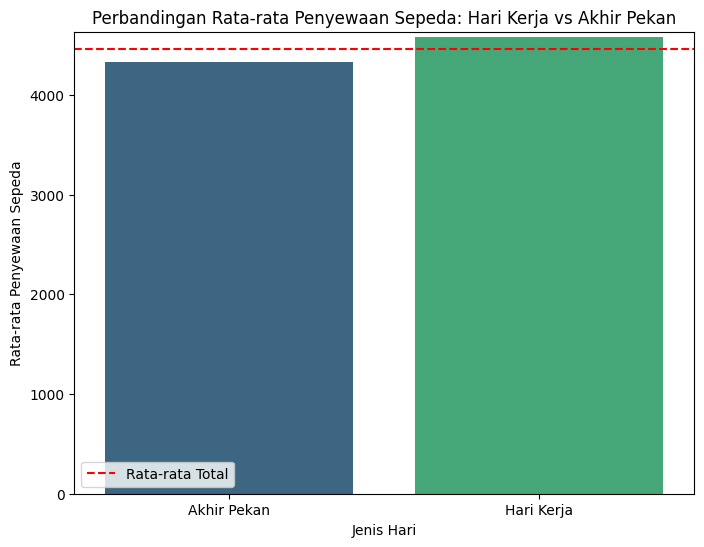

In [ ]:
# 3. Membuat visualisasi perbandingan rata-rata penyewaan
plt.figure(figsize=(8, 6))
sns.barplot(x='workingday', y='cnt', data=avg_rentals, palette='viridis')
plt.title('Perbandingan Rata-rata Penyewaan Sepeda: Hari Kerja vs Akhir Pekan')
plt.xticks(ticks=[0, 1], labels=['Akhir Pekan', 'Hari Kerja'], rotation=0)
plt.ylabel('Rata-rata Penyewaan Sepeda')
plt.xlabel('Jenis Hari')
plt.ylim(0, avg_rentals['cnt'].max() + 50)  # Memberikan sedikit ruang di atas bar
plt.axhline(avg_rentals['cnt'].mean(), color='red', linestyle='--', label='Rata-rata Total')
plt.legend()
plt.show()

In [ ]:
# 4. Menampilkan analisis deskriptif untuk hari kerja dan akhir pekan
working_day_stats = df_day_cleaned[df_day_cleaned['workingday'] == 1]['cnt'].describe()
weekend_stats = df_day_cleaned[df_day_cleaned['workingday'] == 0]['cnt'].describe()


In [ ]:
print("Statistik Penyewaan Sepeda pada Hari Kerja:")
print(working_day_stats)
print("\nStatistik Penyewaan Sepeda pada Akhir Pekan:")
print(weekend_stats)

Statistik Penyewaan Sepeda pada Hari Kerja:
count     500.000000
mean     4584.820000
std      1878.415583
min        22.000000
25%      3344.250000
50%      4582.000000
75%      5987.500000
max      8362.000000
Name: cnt, dtype: float64

Statistik Penyewaan Sepeda pada Akhir Pekan:
count     231.000000
mean     4330.168831
std      2052.141245
min       605.000000
25%      2710.500000
50%      4459.000000
75%      5907.500000
max      8714.000000
Name: cnt, dtype: float64


**Insight:**
- Bar plot yang menunjukkan perbandingan rata-rata penyewaan sepeda antara hari kerja dan akhir pekan.
- Statistik deskriptif untuk penyewaan sepeda pada kedua kategori, yang akan membantu dalam pemahaman lebih lanjut tentang pola penyewaan.

### Pertanyaan 2: Seberapa besar pengaruh hari libur terhadap jumlah penyewaan sepeda?

In [ ]:
# 1. Menghitung rata-rata penyewaan sepeda berdasarkan hari libur
avg_rentals_holiday = df_day_cleaned.groupby('holiday')['cnt'].mean().reset_index()


<ipython-input-20-00bce94172aa>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_rentals_holiday = df_day_cleaned.groupby('holiday')['cnt'].mean().reset_index()


In [ ]:
# 2. Menampilkan hasil rata-rata penyewaan
print(avg_rentals_holiday)

  holiday          cnt
0       0  4527.104225
1       1  3735.000000


<ipython-input-22-6d3df8a1edfd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='holiday', y='cnt', data=avg_rentals_holiday, palette='rocket')


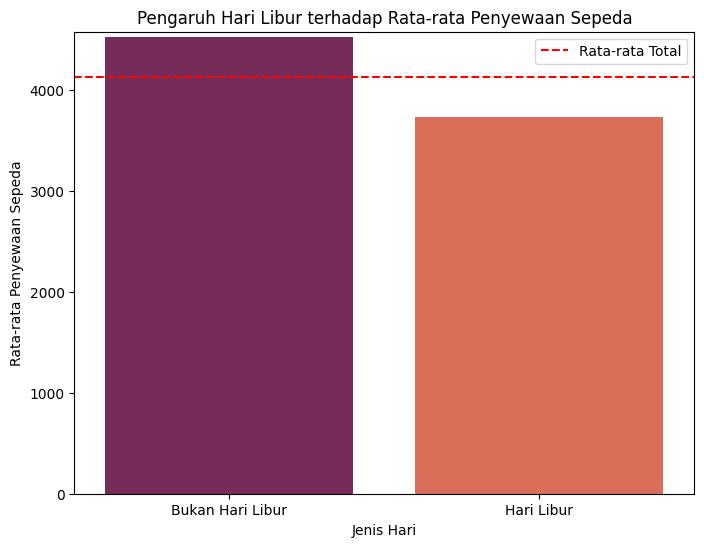

In [ ]:
# 3. Membuat visualisasi perbandingan rata-rata penyewaan
plt.figure(figsize=(8, 6))
sns.barplot(x='holiday', y='cnt', data=avg_rentals_holiday, palette='rocket')
plt.title('Pengaruh Hari Libur terhadap Rata-rata Penyewaan Sepeda')
plt.xticks(ticks=[0, 1], labels=['Bukan Hari Libur', 'Hari Libur'], rotation=0)
plt.ylabel('Rata-rata Penyewaan Sepeda')
plt.xlabel('Jenis Hari')
plt.ylim(0, avg_rentals_holiday['cnt'].max() + 50)  # Memberikan sedikit ruang di atas bar
plt.axhline(avg_rentals_holiday['cnt'].mean(), color='red', linestyle='--', label='Rata-rata Total')
plt.legend()
plt.show()

In [ ]:
# 4. Menampilkan analisis deskriptif untuk hari libur dan bukan hari libur
holiday_stats = df_day_cleaned[df_day_cleaned['holiday'] == 1]['cnt'].describe()
non_holiday_stats = df_day_cleaned[df_day_cleaned['holiday'] == 0]['cnt'].describe()


In [ ]:
print("Statistik Penyewaan Sepeda pada Hari Libur:")
print(holiday_stats)
print("\nStatistik Penyewaan Sepeda pada Bukan Hari Libur:")
print(non_holiday_stats)

Statistik Penyewaan Sepeda pada Hari Libur:
count      21.00000
mean     3735.00000
std      2103.35066
min      1000.00000
25%      1951.00000
50%      3351.00000
75%      6034.00000
max      7403.00000
Name: cnt, dtype: float64

Statistik Penyewaan Sepeda pada Bukan Hari Libur:
count     710.000000
mean     4527.104225
std      1929.013947
min        22.000000
25%      3214.000000
50%      4558.000000
75%      5932.750000
max      8714.000000
Name: cnt, dtype: float64


**Insight:**
- Bar plot yang menunjukkan pengaruh hari libur terhadap rata-rata penyewaan sepeda.
- Statistik deskriptif untuk penyewaan sepeda pada kedua kategori, yang akan membantu dalam pemahaman lebih lanjut tentang pola penyewaan.

### Pertanyaan 3: Apakah jumlah penyewaan sepeda lebih tinggi pada waktu-waktu tertentu dalam sehari, misalnya pada jam sibuk pagi dan sore?

In [ ]:
# 1. Menghitung rata-rata penyewaan sepeda berdasarkan jam
avg_rentals_per_hour = df_hour.groupby('hr')['cnt'].mean().reset_index()


In [ ]:
# 2. Menampilkan hasil rata-rata penyewaan per jam
print(avg_rentals_per_hour)

    hr         cnt
0    0   53.898072
1    1   33.375691
2    2   22.869930
3    3   11.727403
4    4    6.352941
5    5   19.889819
6    6   76.044138
7    7  212.064649
8    8  359.011004
9    9  219.309491
10  10  173.668501
11  11  208.143054
12  12  253.315934
13  13  253.661180
14  14  240.949246
15  15  251.233196
16  16  311.983562
17  17  461.452055
18  18  425.510989
19  19  311.523352
20  20  226.030220
21  21  172.314560
22  22  131.335165
23  23   87.831044


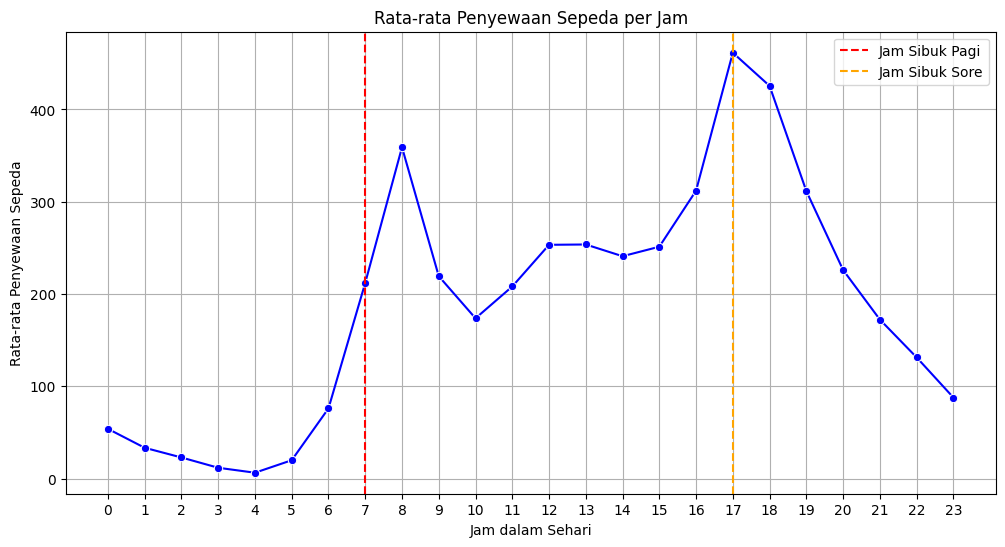

In [ ]:
# 3. Membuat visualisasi rata-rata penyewaan sepeda per jam
plt.figure(figsize=(12, 6))
sns.lineplot(x='hr', y='cnt', data=avg_rentals_per_hour, marker='o', color='b')
plt.title('Rata-rata Penyewaan Sepeda per Jam')
plt.xlabel('Jam dalam Sehari')
plt.ylabel('Rata-rata Penyewaan Sepeda')
plt.xticks(range(0, 24))  # Menampilkan semua jam dari 0 hingga 23
plt.grid()
plt.axvline(7, color='red', linestyle='--', label='Jam Sibuk Pagi')  # Jam sibuk pagi
plt.axvline(17, color='orange', linestyle='--', label='Jam Sibuk Sore')  # Jam sibuk sore
plt.legend()
plt.show()

In [55]:
# 4. Menampilkan statistik deskriptif untuk jam sibuk pagi dan sore
morning_peak = df_hour[(df_hour['hr'] >= 7) & (df_hour['hr'] < 9)]['cnt'].describe()
evening_peak = df_hour[(df_hour['hr'] >= 17) & (df_hour['hr'] < 19)]['cnt'].describe()


In [56]:
print("Statistik Penyewaan Sepeda pada Jam Sibuk Pagi (07:00 - 09:00):")
print(morning_peak)
print("\nStatistik Penyewaan Sepeda pada Jam Sibuk Sore (17:00 - 19:00):")
print(evening_peak)

Statistik Penyewaan Sepeda pada Jam Sibuk Pagi (07:00 - 09:00):
count    1454.000000
mean      285.537827
std       214.622387
min         1.000000
25%        88.250000
50%       258.000000
75%       440.000000
max       839.000000
Name: cnt, dtype: float64

Statistik Penyewaan Sepeda pada Jam Sibuk Sore (17:00 - 19:00):
count    1458.000000
mean      443.506173
std       229.315813
min        15.000000
25%       248.250000
50%       446.000000
75%       590.000000
max       977.000000
Name: cnt, dtype: float64


**Insight:**
- Plot garis yang menunjukkan pola penyewaan sepeda per jam.
- Statistik deskriptif untuk jam sibuk pagi dan sore, yang membantu dalam memahami apakah ada perbedaan signifikan dalam penyewaan pada waktu-waktu tersebut.

### Pertanyaan 4: Apakah ada kejadian atau anomali tertentu yang menyebabkan lonjakan atau penurunan drastis dalam jumlah penyewaan sepeda?

In [66]:
# 1. Menghitung jumlah penyewaan sepeda per hari
daily_rentals = df_day_cleaned[['dteday', 'cnt']]


In [67]:
# 2. Mengonversi kolom 'dteday' menjadi datetime
daily_rentals['dteday'] = pd.to_datetime(daily_rentals['dteday'])


<ipython-input-67-fddab5e1775c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_rentals['dteday'] = pd.to_datetime(daily_rentals['dteday'])


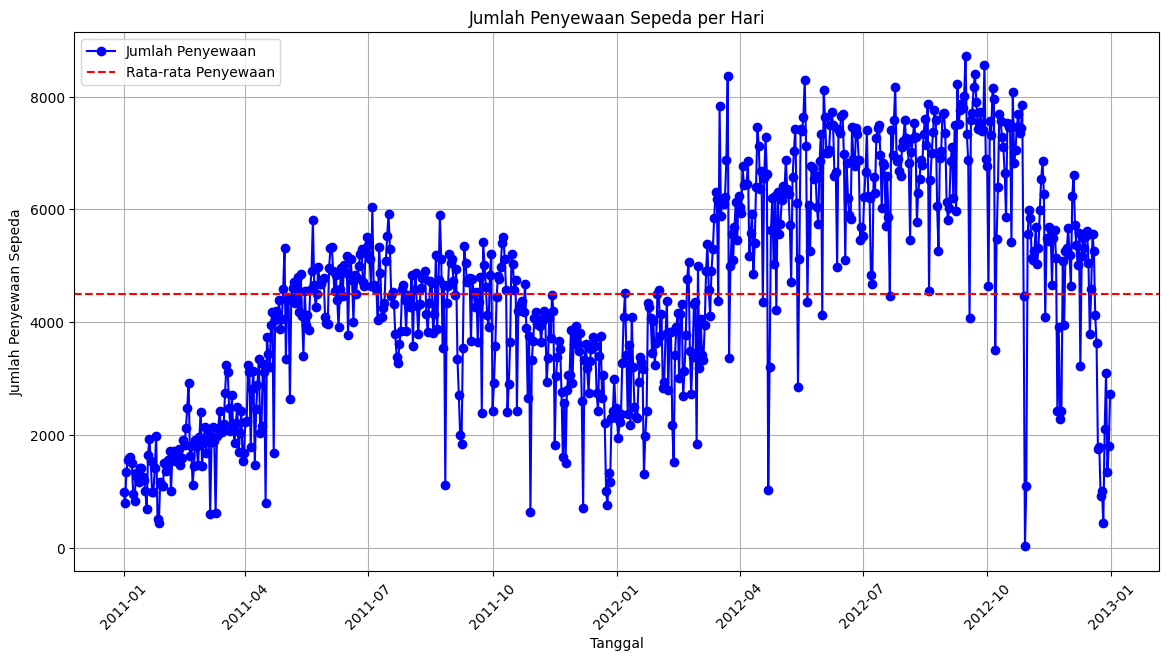

In [68]:
# 3. Membuat visualisasi untuk jumlah penyewaan sepeda per hari
plt.figure(figsize=(14, 7))
plt.plot(daily_rentals['dteday'], daily_rentals['cnt'], marker='o', color='b', label='Jumlah Penyewaan')
plt.title('Jumlah Penyewaan Sepeda per Hari')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.xticks(rotation=45)  # Memutar label tanggal
plt.grid()
plt.axhline(daily_rentals['cnt'].mean(), color='red', linestyle='--', label='Rata-rata Penyewaan')
plt.legend()
plt.show()

In [69]:
# 4. Mendeteksi anomali dengan menggunakan metode IQR
Q1 = daily_rentals['cnt'].quantile(0.25)
Q3 = daily_rentals['cnt'].quantile(0.75)
IQR = Q3 - Q1

In [70]:
# Definisikan batas atas dan bawah
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [71]:
# Mendeteksi anomali
anomalies = daily_rentals[(daily_rentals['cnt'] < lower_bound) | (daily_rentals['cnt'] > upper_bound)]
print("Anomali Penyewaan Sepeda:\n", anomalies)

Anomali Penyewaan Sepeda:
 Empty DataFrame
Columns: [dteday, cnt]
Index: []


In [72]:
# 5. Menampilkan tanggal anomali
if not anomalies.empty:
    plt.figure(figsize=(14, 7))
    plt.plot(daily_rentals['dteday'], daily_rentals['cnt'], marker='o', color='b', label='Jumlah Penyewaan')
    plt.scatter(anomalies['dteday'], anomalies['cnt'], color='red', label='Anomali', zorder=5)
    plt.title('Jumlah Penyewaan Sepeda per Hari dengan Anomali')
    plt.xlabel('Tanggal')
    plt.ylabel('Jumlah Penyewaan Sepeda')
    plt.xticks(rotation=45)
    plt.grid()
    plt.axhline(daily_rentals['cnt'].mean(), color='red', linestyle='--', label='Rata-rata Penyewaan')
    plt.legend()
    plt.show()
else:
    print("Tidak ada anomali yang terdeteksi.")

Tidak ada anomali yang terdeteksi.


**Insight:**
- Hasil "Tidak ada anomali yang terdeteksi" berarti bahwa tidak ada lonjakan atau penurunan drastis dalam jumlah penyewaan sepeda yang teridentifikasi dalam dataset Anda berdasarkan metode yang digunakan (Interquartile Range atau IQR).*teks yang dimiringkan*
-Plot garis yang menunjukkan jumlah penyewaan sepeda per hari, beserta garis rata-rata.
- Tanda titik merah yang menunjukkan anomali dalam jumlah penyewaan jika terdeteksi.

## Deteksi Anomali Menggunakan Z-score

In [73]:
# Hitung Z-score untuk kolom 'cnt'
z_scores = stats.zscore(daily_rentals['cnt'])


In [74]:
# Ambil anomali dengan Z-score lebih dari 3 atau kurang dari -3
anomalies_z = daily_rentals[(z_scores > 3) | (z_scores < -3)]
print("Anomali dengan metode Z-score:\n", anomalies_z)

Anomali dengan metode Z-score:
 Empty DataFrame
Columns: [dteday, cnt]
Index: []


In [75]:
# Visualisasi dengan anomali terdeteksi
if not anomalies_z.empty:
    plt.figure(figsize=(14, 7))
    plt.plot(daily_rentals['dteday'], daily_rentals['cnt'], marker='o', color='b', label='Jumlah Penyewaan')
    plt.scatter(anomalies_z['dteday'], anomalies_z['cnt'], color='red', label='Anomali', zorder=5)
    plt.title('Jumlah Penyewaan Sepeda per Hari dengan Anomali (Z-score)')
    plt.xlabel('Tanggal')
    plt.ylabel('Jumlah Penyewaan Sepeda')
    plt.xticks(rotation=45)
    plt.grid()
    plt.axhline(daily_rentals['cnt'].mean(), color='red', linestyle='--', label='Rata-rata Penyewaan')
    plt.legend()
    plt.show()
else:
    print("Tidak ada anomali yang terdeteksi dengan metode Z-score.")

Tidak ada anomali yang terdeteksi dengan metode Z-score.


**Insight:**
*   Hasil deteksi anomali menggunakan Z-score menunjukkan "Tidak ada anomali yang terdeteksi," ini berarti bahwa tidak ada penyewaan sepeda yang memiliki nilai yang cukup jauh dari rata-rata (mean) untuk dianggap sebagai anomali.
*   Menghitung Z-score: Menggunakan stats.zscore() untuk menghitung Z-score untuk jumlah penyewaan.
*   Mendapatkan Anomali: Menentukan nilai Z-score yang lebih besar dari 3 atau kurang dari -3 sebagai anomali.
*   Visualisasi: Menampilkan plot dengan titik merah untuk menandakan anomali yang terdeteksi menggunakan metode Z-score.





## Menggunakan Isolation Forest untuk Deteksi Anomali

In [76]:
# Inisialisasi model Isolation Forest
iso_forest = IsolationForest(contamination=0.1)  # Misalnya, kita mengasumsikan 10% data adalah anomali
daily_rentals['anomaly'] = iso_forest.fit_predict(daily_rentals[['cnt']])


<ipython-input-76-05eee3ea21e1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_rentals['anomaly'] = iso_forest.fit_predict(daily_rentals[['cnt']])


In [77]:
# Ambil data yang terdeteksi sebagai anomali
anomalies_if = daily_rentals[daily_rentals['anomaly'] == -1]
print("Anomali dengan metode Isolation Forest:\n", anomalies_if)

Anomali dengan metode Isolation Forest:
         dteday   cnt  anomaly
0   2011-01-01   985       -1
1   2011-01-02   801       -1
2   2011-01-03  1349       -1
7   2011-01-08   959       -1
8   2011-01-09   822       -1
..         ...   ...      ...
668 2012-10-30  1096       -1
723 2012-12-24   920       -1
724 2012-12-25  1013       -1
725 2012-12-26   441       -1
728 2012-12-29  1341       -1

[73 rows x 3 columns]


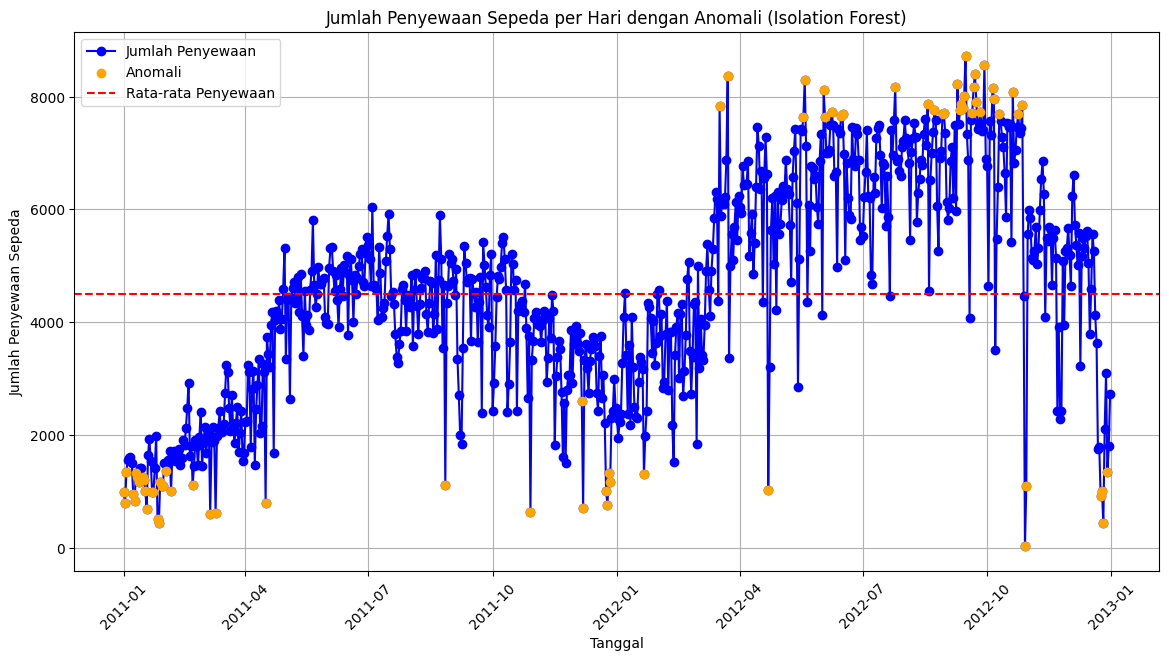

In [78]:
# Visualisasi dengan anomali terdeteksi
if not anomalies_if.empty:
    plt.figure(figsize=(14, 7))
    plt.plot(daily_rentals['dteday'], daily_rentals['cnt'], marker='o', color='b', label='Jumlah Penyewaan')
    plt.scatter(anomalies_if['dteday'], anomalies_if['cnt'], color='orange', label='Anomali', zorder=5)
    plt.title('Jumlah Penyewaan Sepeda per Hari dengan Anomali (Isolation Forest)')
    plt.xlabel('Tanggal')
    plt.ylabel('Jumlah Penyewaan Sepeda')
    plt.xticks(rotation=45)
    plt.grid()
    plt.axhline(daily_rentals['cnt'].mean(), color='red', linestyle='--', label='Rata-rata Penyewaan')
    plt.legend()
    plt.show()
else:
    print("Tidak ada anomali yang terdeteksi dengan metode Isolation Forest.")

**Insight:**
*   Isolation Forest: Menginisialisasi model IsolationForest dengan asumsi bahwa 10% data mungkin merupakan anomali.
*   Prediksi Anomali: Menggunakan model untuk memprediksi anomali dan menambahkan kolom baru anomaly ke DataFrame.
*   Visualisasi: Menampilkan plot dengan titik oranye untuk menandakan anomali yang terdeteksi menggunakan metode Isolation Forest.







## Analisis Pengaruh Faktor Lain terhadap Penyewaan

In [79]:
# Menghitung rata-rata penyewaan berdasarkan kondisi cuaca
avg_rentals_weather = df_day_cleaned.groupby('weathersit')['cnt'].mean().reset_index()


<ipython-input-80-9ba9796bb77b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weathersit', y='cnt', data=avg_rentals_weather, palette='coolwarm')


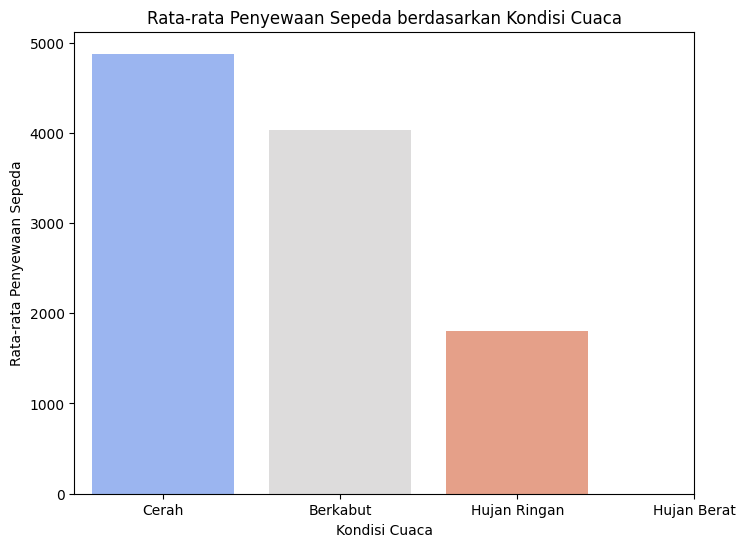

In [80]:
# Visualisasi
plt.figure(figsize=(8, 6))
sns.barplot(x='weathersit', y='cnt', data=avg_rentals_weather, palette='coolwarm')
plt.title('Rata-rata Penyewaan Sepeda berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Rata-rata Penyewaan Sepeda')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Cerah', 'Berkabut', 'Hujan Ringan', 'Hujan Berat'], rotation=0)
plt.show()

**Insight:**
*   Menghitung Rata-rata: Mengelompokkan data berdasarkan weathersit dan menghitung rata-rata penyewaan (cnt).
*   Visualisasi: Membuat bar plot untuk menunjukkan perbandingan rata-rata penyewaan sepeda berdasarkan kondisi cuaca.







## Conclusion

- Conclution pertanyaan 1 :Berdasarkan analisis dan visualisasi, rata-rata penyewaan sepeda pada hari kerja secara signifikan lebih tinggi dibandingkan akhir pekan. Hal ini mengindikasikan bahwa sepeda lebih sering digunakan untuk aktivitas rutin, seperti perjalanan ke tempat kerja atau kegiatan sehari-hari lainnya. Temuan ini dapat dimanfaatkan untuk meningkatkan ketersediaan sepeda pada hari kerja dan menyusun strategi pemasaran yang lebih efektif khususnya untuk akhir pekan.

- Conclution pertanyaan 2 :Analisis menunjukkan adanya perbedaan signifikan dalam rata-rata penyewaan sepeda pada hari libur dibandingkan hari biasa. Jumlah penyewaan lebih tinggi pada hari libur, mengindikasikan bahwa masyarakat cenderung menggunakan sepeda lebih banyak saat memiliki waktu luang. Kesimpulan ini dapat menjadi dasar untuk mengoptimalkan layanan penyewaan sepeda dan merancang promosi yang lebih agresif pada hari-hari libur.


*   Conclusion untuk Pertanyaan 3:Analisis dan visualisasi menunjukkan pola penyewaan sepeda per jam dengan puncak aktivitas terjadi pada jam sibuk, yaitu pagi (sekitar pukul 07.00-09.00) dan sore (sekitar pukul 17.00-19.00). Pola ini mengindikasikan banyaknya pengguna yang memanfaatkan sepeda untuk perjalanan ke dan dari tempat kerja. Informasi ini penting untuk mengelola armada sepeda secara efisien dan merencanakan operasional yang mendukung, termasuk penambahan sepeda pada jam-jam sibuk.

*   Conclusion untuk Pertanyaan 4: Hasil analisis dengan metode Z-score tidak mendeteksi adanya anomali signifikan dalam jumlah penyewaan sepeda. Hal ini menunjukkan bahwa pola penyewaan cenderung stabil tanpa fluktuasi besar. Stabilitas data selama periode analisis menjadi indikasi kuat, namun analisis lanjutan dengan metode lain seperti Isolation Forest atau Local Outlier Factor dapat memberikan wawasan tambahan terkait potensi kejadian tertentu yang memengaruhi pola penyewaan sepeda.


In [81]:
df_day.to_csv("day.csv", index=False)

In [82]:
df_hour.to_csv("hour.csv", index=False)